# Лабораторная работа № 2: Методы многомерной оптимизации

## Поисковые методы оптимизации функции трёх переменных

**Вариант 1**

**Целевая функция:**

\$ f(x, y, z) = 2(x')^2 + 3(y')^2 + z^4 \$

где $x'$ и $y'$ — координаты после поворота и смещения на плоскости $XZ$:

$$
\begin{cases}
x' = (x - x^0) \cos \alpha + (y - y^0) \sin \alpha \\
y' = -(x - x^0) \sin \alpha + (y - y^0) \cos \alpha
\end{cases}
$$

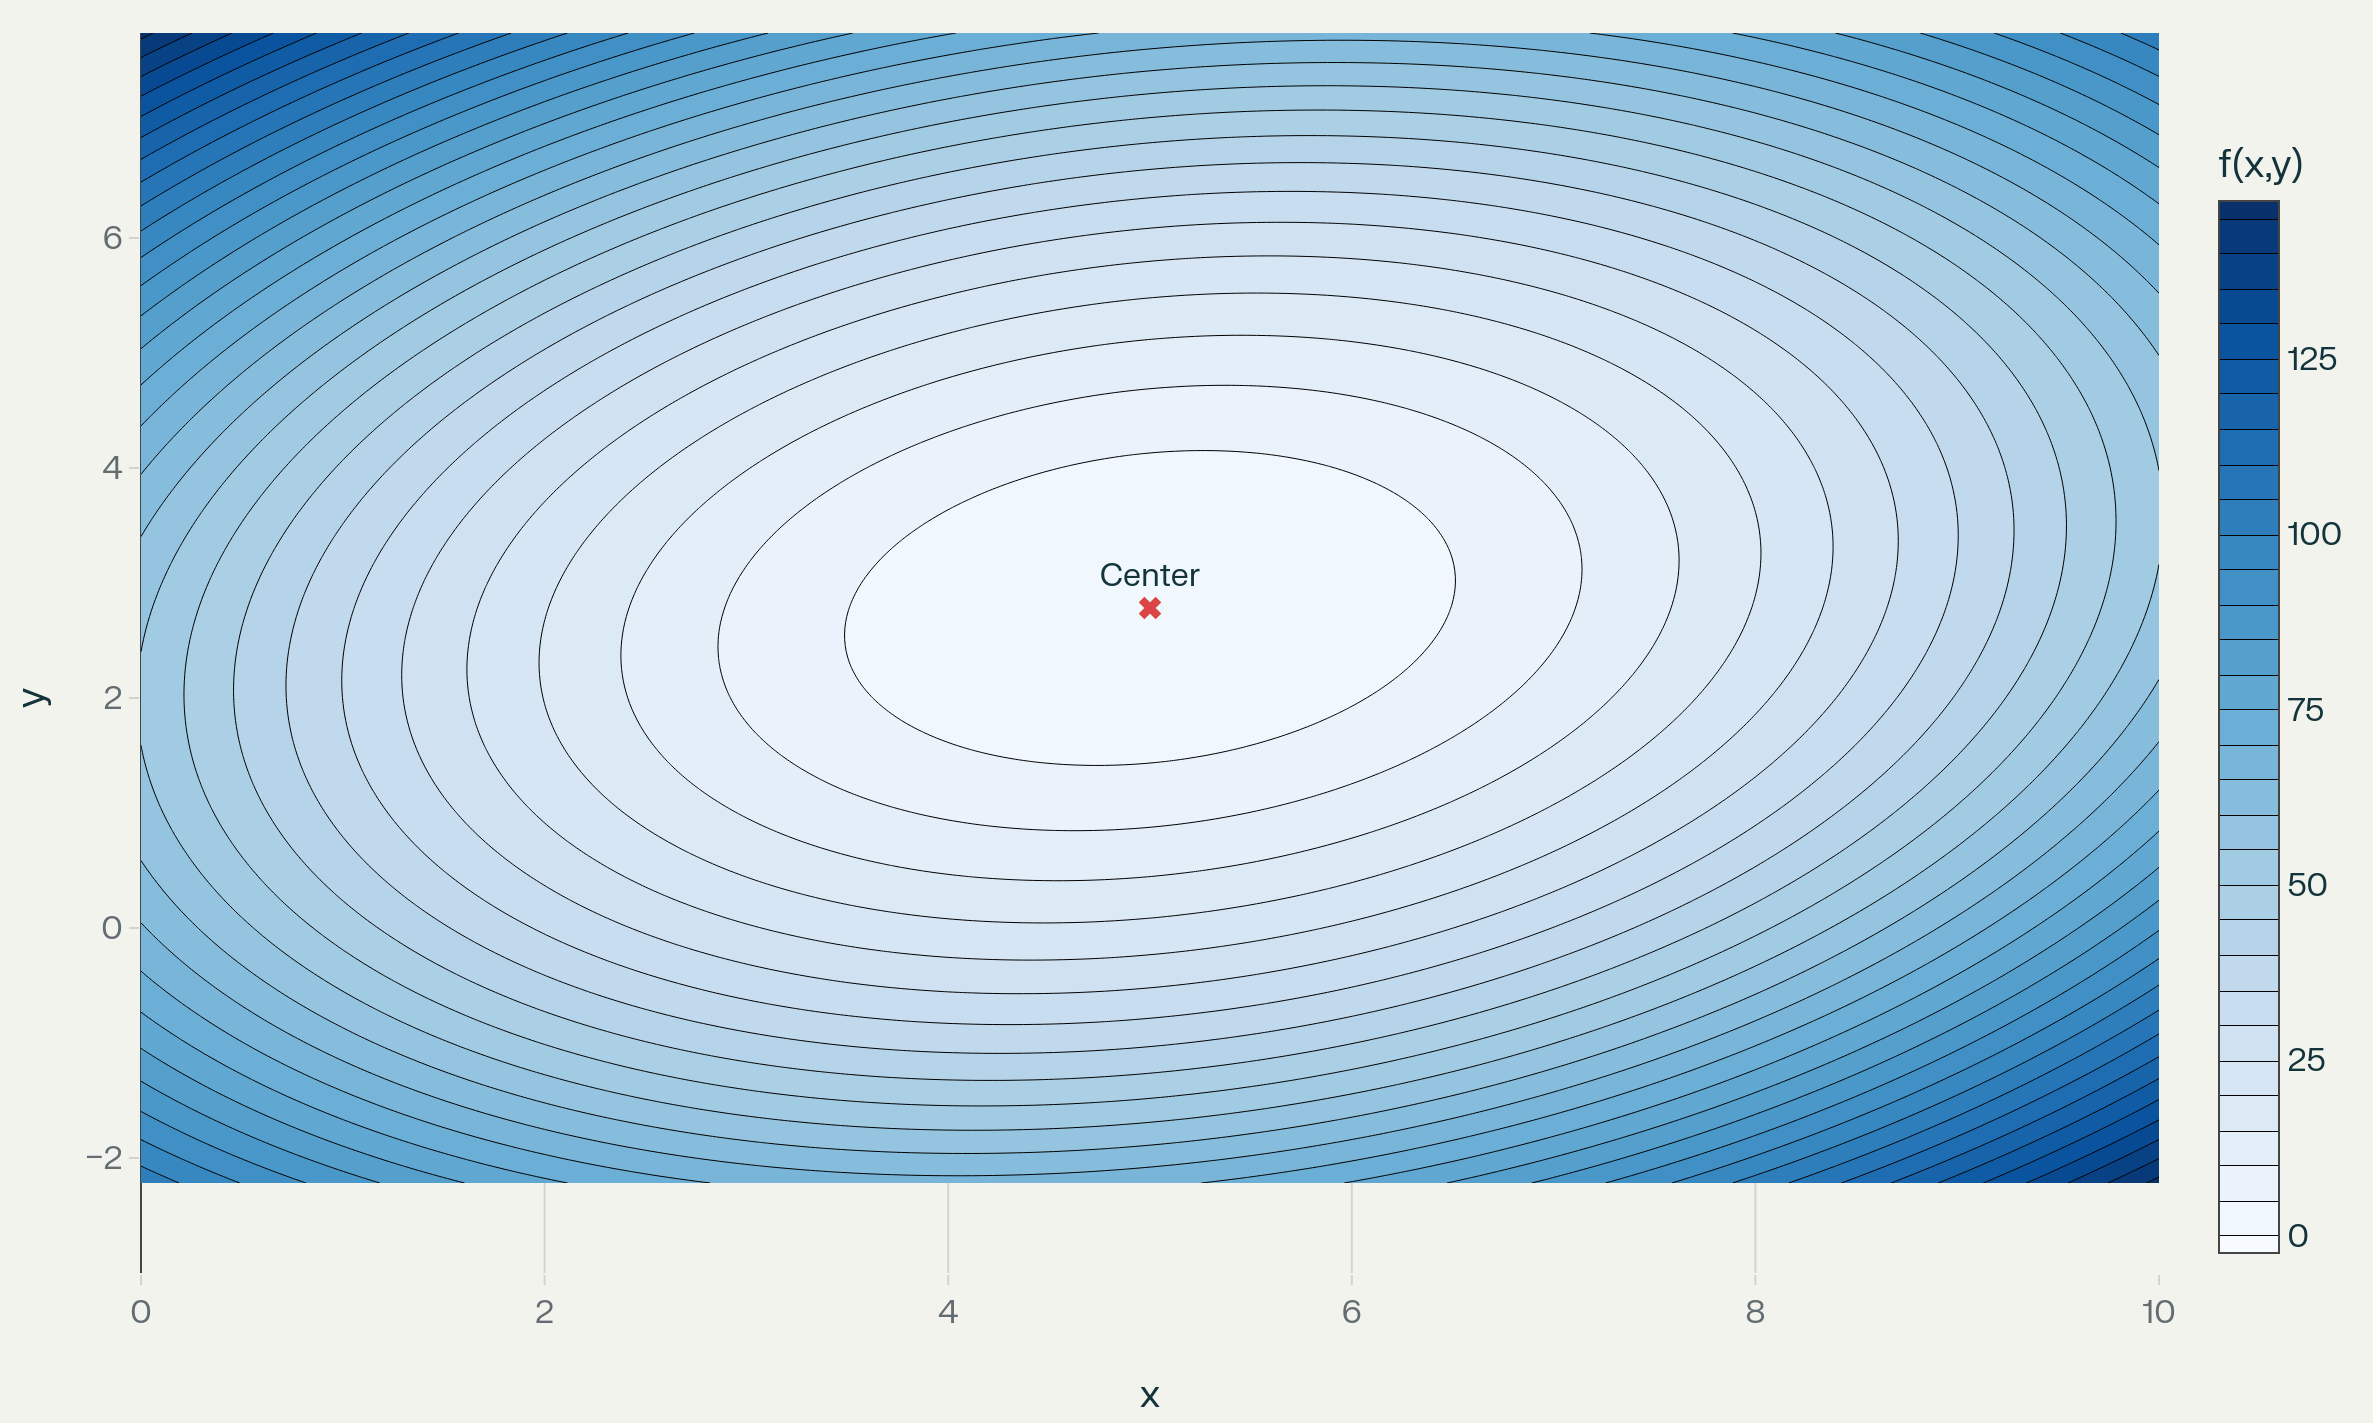

<p style="text-align:center; font-weight:bold; font-size:16px; margin-top:6px;">
  График линий уровня целевой функции
</p>



**Параметры варианта:**

* **Смещение центра координат:** $(x^0, y^0) = (5, 2)$
* **Угол поворота:** $\alpha = \pi/6$
* **Коэффициенты функции:** $a=2, b=3$

**Цель работы:**
Найти минимум функции методами координатного спуска, наискорейшего спуска и методом Ньютона с использованием одномерного поиска.



# 1. ТЕОРЕТИЧЕСКАЯ ЧАСТЬ

## 1.1 Общая постановка задачи

Требуется найти минимум функции трёх переменных $f(x, y, z)$:
$$\min_{\mathbf{x} \in \mathbb{R}^3} f(\mathbf{x})$$

используя три метода многомерной оптимизации:
1. **Координатный спуск**
2. **Метод наискорейшего спуска** (метод градиента)
3. **Метод Ньютона**

## 1.2 Общая схема поиска

Все методы используют итерационную схему:
$$\mathbf{X}^{k+1} = \mathbf{X}^k + \alpha_k \mathbf{P}^k$$

где:
- $\mathbf{X}^k$ — текущая точка на $k$-й итерации
- $\alpha_k$ — длина шага (коэффициент демпфирования)
- $\mathbf{P}^k$ — направление поиска

## 1.3 Методы выбора направления

### Метод 1: Координатный спуск

**Направление:**
$$\mathbf{P}_k = \mathbf{e}^{k \bmod n}$$
где $\mathbf{e}_i$ — $i$-й единичный вектор (орт), $n = 3$ — размерность пространства.

**Шаг:**
$$\alpha_k = \arg\min_{\alpha} f(\mathbf{X}^k + \alpha \mathbf{P}^k)$$

**Особенности:** простота реализации, не требует вычисления производных. Направление последовательно переключается между координатными осями.

### Метод 2: Наискорейший спуск

**Направление:**
$$\mathbf{P}^k = -\nabla f(\mathbf{X}^k)$$

**Шаг:**
$$\alpha_k = \arg\min_{\alpha} f(\mathbf{X}^k + \alpha \mathbf{P}^k)$$

**Особенности:** направление поиска — антиградиент функции (направление наискорейшего убывания). Шаг выбирается путём одномерной минимизации по направлению.

### Метод 3: Метод Ньютона

**Направление:**
$$\mathbf{P}^k = -\left[\nabla^2 f(\mathbf{X}^k)\right]^{-1} \nabla f(\mathbf{X}^k)$$

где $\nabla^2 f(\mathbf{X}^k)$ — матрица Гессе (матрица вторых производных).

**Шаг:**
$$\alpha_k = 1$$
(фиксирован, выбирать не надо)

**Особенности:** квадратичная сходимость вблизи минимума. Требует вычисления и обращения матрицы Гессе.

## 1.4 Одномерный поиск

В методах координатного спуска и наискорейшего спуска шаг $\alpha_k$ выбирается путём решения задачи одномерной минимизации:
$$\alpha_k = \arg\min_{\alpha} f(\mathbf{X}_k + \alpha \mathbf{P}_k)$$

Для этого используется метод одномерного поиска - метод Фибоначчи, реализованный в первой лабораторной работе.

## 1.5 Критерии остановки

Итерации прекращаются при выполнении одного из условий:

1. **По градиенту:** $\|\nabla f(\mathbf{X}^k)\| < \varepsilon_g$
2. **По переменным:** $\|\mathbf{X}^{k+1} - \mathbf{X}^k\| < \varepsilon_x$
3. **По функции:** $|f(\mathbf{X}^{k+1}) - f(\mathbf{X}^k)| < \varepsilon_f$
4. **По числу итераций:** $k \geq k_{\max}$

где $\varepsilon_g$, $\varepsilon_x$, $\varepsilon_f$ — заданные точности, $k_{\max}$ — максимальное число итераций.


# 2. ЦЕЛЕВАЯ ФУНКЦИЯ

## 2.1 Определение функции

Рассматривается функция трёх переменных $f(x, y, z)$, полученная преобразованием координат (поворот и смещение) канонической квадратичной формы и члена четвёртого порядка.

**Базовая функция:**
$$f(x', y', z) = 2(x')^2 + 3(y')^2 + z^4$$

**Преобразование координат:**
Переход от исходных координат $(x, y)$ к $(x', y')$ осуществляется поворотом на угол $\alpha = \pi/6$ ($30^\circ$) и смещением центра в точку $(x^0, y^0) = (5, 2)$:

$$
\begin{cases}
x' = (x - 5)\cos\frac{\pi}{6} + (y - 2)\sin\frac{\pi}{6} \\
y' = -(x - 5)\sin\frac{\pi}{6} + (y - 2)\cos\frac{\pi}{6}
\end{cases}
$$

**Глобальный минимум:**
- В преобразованных координатах: $x' = 0, y' = 0, z = 0$
- В исходных координатах: $\mathbf{X}^* = (5, 2, 0)$
- Значение функции: $f(\mathbf{X}^*) = 0$

## 2.2 Производные функции

Для реализации градиентных методов и метода Ньютона вычислены первые и вторые частные производные.

**Частные производные первого порядка (компоненты градиента):**

$$
\frac{\partial f}{\partial x} = 4x' \cdot \frac{\partial x'}{\partial x} + 6y' \cdot \frac{\partial y'}{\partial x} = 4x' \cos\frac{\pi}{6} - 6y' \sin\frac{\pi}{6}
$$

$$
\frac{\partial f}{\partial y} = 4x' \cdot \frac{\partial x'}{\partial y} + 6y' \cdot \frac{\partial y'}{\partial y} = 4x' \sin\frac{\pi}{6} + 6y' \cos\frac{\pi}{6}
$$

$$
\frac{\partial f}{\partial z} = 4z^3
$$

После подстановки значений $\sin(\pi/6)=1/2, \cos(\pi/6)=\sqrt{3}/2$ и упрощения:

$$
\nabla f(\mathbf{X}) = \begin{pmatrix}
\frac{9}{2}x - \frac{\sqrt{3}}{2}y - \frac{45 - 2\sqrt{3}}{2} \\
-\frac{\sqrt{3}}{2}x + \frac{11}{2}y - \frac{22 - 5\sqrt{3}}{2} \\
4z^3
\end{pmatrix}
$$

**Частные производные второго порядка (элементы матрицы Гессе):**

$$
\frac{\partial^2 f}{\partial x^2} = 4\cos^2\frac{\pi}{6} + 6\sin^2\frac{\pi}{6} = 4\cdot\frac{3}{4} + 6\cdot\frac{1}{4} = \frac{9}{2}
$$

$$
\frac{\partial^2 f}{\partial y^2} = 4\sin^2\frac{\pi}{6} + 6\cos^2\frac{\pi}{6} = 4\cdot\frac{1}{4} + 6\cdot\frac{3}{4} = \frac{11}{2}
$$

$$
\frac{\partial^2 f}{\partial x \partial y} = \frac{\partial^2 f}{\partial y \partial x} = (4-6)\sin\frac{\pi}{6}\cos\frac{\pi}{6} = -2\cdot\frac{1}{2}\cdot\frac{\sqrt{3}}{2} = -\frac{\sqrt{3}}{2}
$$

$$
\frac{\partial^2 f}{\partial z^2} = 12z^2
$$

Остальные смешанные производные равны нулю.

**Матрица Гессе:**
$$
\nabla^2 f(\mathbf{X}) = \begin{pmatrix}
4.5 & -0.866 & 0 \\
-0.866 & 5.5 & 0 \\
0 & 0 & 12z^2
\end{pmatrix}
$$

*Примечание: Матрица Гессе зависит от $z$, поэтому она пересчитывается на каждой итерации метода Ньютона.*


# 3. ПОДГОТОВКА И ИМПОРТЫ

## 3.1 Импорт библиотек

In [441]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
from typing import Tuple, List, Dict, Callable
import warnings
warnings.filterwarnings('ignore')

# Параметры отображения
plt.style.use('seaborn-v0_8-darkgrid')
np.set_printoptions(precision=8, suppress=True)

## 3.2 Инициализация параметров и констант

In [442]:
# Параметры целевой функции
ALPHA = np.pi / 6           # Угол поворота: α = π/6
X0_CENTER = 5.0             # Координата центра смещения: x₀
Y0_CENTER = 2.0             # Координата центра смещения: y₀
COS_ALPHA = np.cos(ALPHA)   # cos(π/6) = √3/2
SIN_ALPHA = np.sin(ALPHA)   # sin(π/6) = 1/2

# Параметры методов оптимизации
EPSILON_GRADIENT = 1e-6     # Критерий останова по градиенту
EPSILON_VARIABLES = 1e-6    # Критерий останова по переменным
EPSILON_FUNCTION = 1e-4     # Критерий останова по функции
MAX_ITERATIONS = 100        # Максимальное число итераций

# Параметры одномерного поиска (метод Фибоначчи)
EPSILON_LINE_SEARCH = 1e-8  # Точность одномерного поиска

# Начальная точка
INITIAL_POINT = np.array([8.0, 15.0, 16.0])  # Начальная точка для оптимизации

# Аналитическое решение
X_OPTIMAL = np.array([X0_CENTER, Y0_CENTER, 0.0])  # Точка минимума
F_OPTIMAL = 0.0                                      # Значение в минимуме


## 3.3 Информационный вывод

In [443]:
def display_problem_setup():
    """Выводит информацию о параметрах задачи в виде HTML таблиц"""

    # Таблица 1: Целевая функция и преобразование координат
    print("📊 ЦЕЛЕВАЯ ФУНКЦИЯ И ПРЕОБРАЗОВАНИЕ КООРДИНАТ\n")
    df_function = pd.DataFrame({
        'Параметр': [
            'Целевая функция',
            'Угол поворота α',
            'Центр смещения (x₀, y₀)',
            'cos(α)',
            'sin(α)'
        ],
        'Значение': [
            'f(x,y,z) = 2(x\')² + 3(y\')² + z⁴',
            f'π/6 ≈ {np.degrees(ALPHA):.1f}°',
            f'({X0_CENTER}, {Y0_CENTER})',
            f'{COS_ALPHA:.6f} (√3/2)',
            f'{SIN_ALPHA:.6f} (1/2)'
        ]
    })
    display(df_function)
    print()

    # Таблица 2: Аналитическое решение
    print("🎯 АНАЛИТИЧЕСКОЕ РЕШЕНИЕ\n")
    df_solution = pd.DataFrame({
        'Характеристика': [
            'Точка минимума x*',
            'Значение функции f(x*)'
        ],
        'Значение': [
            f'({X_OPTIMAL[0]}, {X_OPTIMAL[1]}, {X_OPTIMAL[2]})',
            f'{F_OPTIMAL:.1f}'
        ]
    })
    display(df_solution)
    print()

    # Таблица 3: Параметры методов оптимизации
    print("⚙️  ПАРАМЕТРЫ МЕТОДОВ ОПТИМИЗАЦИИ\n")
    df_params = pd.DataFrame({
        'Параметр': [
            'Точность по градиенту (εᵍ)',
            'Точность по переменным (εˣ)',
            'Точность по функции (εᶠ)',
            'Максимум итераций (Nₘₐₓ)',
            'Точность 1D поиска (δ)'
        ],
        'Значение': [
            f'{EPSILON_GRADIENT:.0e}',
            f'{EPSILON_VARIABLES:.0e}',
            f'{EPSILON_FUNCTION:.0e}',
            f'{MAX_ITERATIONS}',
            f'{EPSILON_LINE_SEARCH:.0e}'
        ]
    })
    display(df_params)
    print()

    # Таблица 4: Начальная точка
    print("🔴 НАЧАЛЬНАЯ ТОЧКА\n")
    df_initial = pd.DataFrame({
        'Параметр': [
            'Начальная точка x₀'
        ],
        'Значение': [
            f'({INITIAL_POINT[0]}, {INITIAL_POINT[1]}, {INITIAL_POINT[2]})'
        ]
    })
    display(df_initial)

# Вызов функции вывода
display_problem_setup()


📊 ЦЕЛЕВАЯ ФУНКЦИЯ И ПРЕОБРАЗОВАНИЕ КООРДИНАТ



,Параметр,Значение
0,Целевая функция,"f(x,y,z) = 2(x')² + 3(y')² + z⁴"
1,Угол поворота α,π/6 ≈ 30.0°
2,"Центр смещения (x₀, y₀)","(5.0, 2.0)"
3,cos(α),0.866025 (√3/2)
4,sin(α),0.500000 (1/2)



🎯 АНАЛИТИЧЕСКОЕ РЕШЕНИЕ



,Характеристика,Значение
0,Точка минимума x*,"(5.0, 2.0, 0.0)"
1,Значение функции f(x*),0.0



⚙️  ПАРАМЕТРЫ МЕТОДОВ ОПТИМИЗАЦИИ



,Параметр,Значение
0,Точность по градиенту (εᵍ),1e-06
1,Точность по переменным (εˣ),1e-06
2,Точность по функции (εᶠ),1e-04
3,Максимум итераций (Nₘₐₓ),100
4,Точность 1D поиска (δ),1e-08



🔴 НАЧАЛЬНАЯ ТОЧКА



,Параметр,Значение
0,Начальная точка x₀,"(8.0, 15.0, 16.0)"


# 4. РЕАЛИЗАЦИЯ ЦЕЛЕВОЙ ФУНКЦИИ И ПРОИЗВОДНЫХ

## 4.1 Преобразование координат

In [444]:
def transform_coordinates(x: np.ndarray) -> Tuple[float, float, float]:
    """
    Преобразование координат из исходной системы в повёрнутую и смещённую.

    Выполняет центрирование относительно (x₀, y₀) и поворот на угол α.

    Args:
        x: np.ndarray, массив [x, y, z]

    Returns:
        Tuple[float, float, float]: кортеж (x', y', z)
    """
    x_val, y_val, z_val = x[0], x[1], x[2]

    # Центрирование
    dx = x_val - X_OPTIMAL[0]
    dy = y_val - X_OPTIMAL[1]

    # Поворот на угол α
    x_prime = dx * COS_ALPHA + dy * SIN_ALPHA
    y_prime = -dx * SIN_ALPHA + dy * COS_ALPHA

    return x_prime, y_prime, z_val

## 4.2 Целевая функция

In [445]:
def objective_function(x: np.ndarray) -> float:
    """
    Целевая функция f(x, y, z) = 2(x')² + 3(y')² + z⁴

    Args:
        x: np.ndarray, массив [x, y, z]

    Returns:
        float: значение функции в точке x
    """
    x_prime, y_prime, z = transform_coordinates(x)
    return 2 * x_prime**2 + 3 * y_prime**2 + z**4

## 4.3 Аналитический градиент

In [446]:
def gradient_analytical(x: np.ndarray) -> np.ndarray:
    """
    Аналитический градиент функции ∇f(x, y, z)

    Вычисляется через правило цепочки применительно к преобразованным координатам.

    Args:
        x: np.ndarray, массив [x, y, z]

    Returns:
        np.ndarray: вектор градиента размерности 3
    """
    x_prime, y_prime, z = transform_coordinates(x)

    # Производные по преобразованным координатам
    df_dx_prime = 4 * x_prime
    df_dy_prime = 6 * y_prime
    df_dz = 4 * z**3

    # Обратная трансформация градиента (применяем матрицу Якобиана)
    df_dx = df_dx_prime * COS_ALPHA - df_dy_prime * SIN_ALPHA
    df_dy = df_dx_prime * SIN_ALPHA + df_dy_prime * COS_ALPHA

    return np.array([df_dx, df_dy, df_dz])

## 4.4 Матрица Гессе

In [447]:
def hessian(x: np.ndarray) -> np.ndarray:
    """
    Матрица Гессе (вторые производные) ∇²f(x, y, z)

    Блочная матрица: верхний левый 2×2 блок для координат (x, y),
    диагональный элемент (3,3) зависит от z.

    Args:
        x: np.ndarray, массив [x, y, z]

    Returns:
        np.ndarray: матрица Гессе размерности 3×3
    """
    z = x[2]

    # Вторые производные в повёрнутой системе (постоянные)
    d2f_dx2_prime = 4      # ∂²f/∂x'²
    d2f_dy2_prime = 6      # ∂²f/∂y'²
    d2f_dxdy_prime = 0     # ∂²f/∂x'∂y' = 0

    # Трансформация (2×2) блока через матрицу поворота
    cos2 = COS_ALPHA**2
    sin2 = SIN_ALPHA**2
    cos_sin = COS_ALPHA * SIN_ALPHA

    d2f_dx2 = d2f_dx2_prime * cos2 + d2f_dy2_prime * sin2
    d2f_dy2 = d2f_dx2_prime * sin2 + d2f_dy2_prime * cos2
    d2f_dxdy = (d2f_dx2_prime - d2f_dy2_prime) * cos_sin

    # Третья строка и столбец (независимы от поворота)
    d2f_dz2 = 12 * z**2   # ∂²f/∂z²

    # Формирование полной матрицы Гессе
    H = np.array([
        [d2f_dx2,   d2f_dxdy,  0      ],
        [d2f_dxdy,  d2f_dy2,   0      ],
        [0,         0,         d2f_dz2]
    ])

    return H

# 5. ВСПОМОГАТЕЛЬНЫЕ ФУНКЦИИ

## 5.1 Одномерный поиск: Золотое сечение

In [448]:
def line_search_golden_section(
    objective: Callable[[np.ndarray], float],
    x_current: np.ndarray,
    direction: np.ndarray,
    alpha_min: float = 0.0,
    alpha_max: float = 10.0,
    epsilon: float = 1e-8,
    max_iter: int = 100
) -> float:
    """
    Одномерный поиск методом золотого сечения (более надёжный чем Фибоначчи).
    """
    phi = (1 + np.sqrt(5)) / 2  # Золотое сечение
    resphi = 2 - phi

    a, b = alpha_min, alpha_max
    x1 = a + resphi * (b - a)
    x2 = b - resphi * (b - a)
    f1 = objective(x_current + x1 * direction)
    f2 = objective(x_current + x2 * direction)

    for _ in range(max_iter):
        if abs(b - a) < epsilon:
            break

        if f1 < f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + resphi * (b - a)
            f1 = objective(x_current + x1 * direction)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = b - resphi * (b - a)
            f2 = objective(x_current + x2 * direction)

    return (a + b) / 2

## 5.2 Структура для хранения истории итераций

In [449]:
class OptimizationHistory:
    """
    Структура для сохранения истории оптимизационного процесса.

    Attributes:
        iterations: int
            Количество выполненных итераций.
        x_history: List[np.ndarray]
            История точек x^k на каждой итерации.
        f_history: List[float]
            История значений функции f(x^k).
        grad_norm_history: List[float]
            История норм градиента ||∇f(x^k)||.
        alpha_history: List[float]
            История длин шагов α_k (для методов с одномерным поиском).
    """
    def __init__(self):
        self.iterations = 0
        self.x_history = []
        self.f_history = []
        self.grad_norm_history = []
        self.alpha_history = []

    def add_iteration(
        self,
        x: np.ndarray,
        f_value: float,
        grad_norm: float,
        alpha: float = None
    ):
        """
        Добавить результаты итерации в историю.

        Args:
            x: np.ndarray
                Точка на текущей итерации.
            f_value: float
                Значение функции в текущей точке.
            grad_norm: float
                Норма градиента в текущей точке.
            alpha: float, опционально
                Длина шага (для методов градиента).
        """
        self.x_history.append(x.copy())
        self.f_history.append(f_value)
        self.grad_norm_history.append(grad_norm)
        if alpha is not None:
            self.alpha_history.append(alpha)
        self.iterations += 1

    def get_summary_dataframe(self) -> pd.DataFrame:
        """
        Получить сводку истории в виде DataFrame.

        Returns:
            pd.DataFrame: таблица с колонками [Итерация, x, f(x), ||∇f||, α]
        """
        data = {
            'Итерация': list(range(self.iterations)),
            'f(x)': [f'{f:.8e}' for f in self.f_history],
            '||∇f(x)||': [f'{g:.8e}' for g in self.grad_norm_history]
        }

        if self.alpha_history:
            data['α'] = [f'{a:.8e}' for a in self.alpha_history]

        return pd.DataFrame(data)

# 6. МЕТОДЫ МНОГОМЕРНОЙ ОПТИМИЗАЦИИ

## 6.1 Метод координатного спуска

### Реализация

In [450]:
class CoordinateDescentMethod:
    """
    Метод координатного спуска для многомерной оптимизации.

    На каждой итерации спускаемся по одной координате, выбирая оптимальный шаг
    посредством одномерного поиска.
    """

    def __init__(
        self,
        objective: Callable[[np.ndarray], float],
        gradient: Callable[[np.ndarray], np.ndarray],
        epsilon_gradient: float = EPSILON_GRADIENT,
        epsilon_variables: float = EPSILON_VARIABLES,
        max_iterations: int = MAX_ITERATIONS
    ):
        self.objective = objective
        self.gradient = gradient
        self.epsilon_gradient = epsilon_gradient
        self.epsilon_variables = epsilon_variables
        self.max_iterations = max_iterations
        self.history = OptimizationHistory()
        self.stop_reason = None

    def optimize(self, x_initial: np.ndarray) -> Tuple[np.ndarray, OptimizationHistory, int]:
        """
        Выполнить оптимизацию методом координатного спуска.

        Алгоритм:
        1. На каждой итерации k выбираем координату i = (k mod n)
        2. Фиксируем все остальные координаты
        3. Минимизируем функцию по i-й координате используя одномерный поиск
        4. Проверяем критерии остановки
        """
        x = x_initial.copy()
        n_dim = len(x)
        self.history = OptimizationHistory()
        self.stop_reason = None

        for k in range(self.max_iterations):
            # Выбираем координату для спуска (циклический порядок)
            coord_idx = k % n_dim
            direction = np.zeros(n_dim)
            direction[coord_idx] = 1.0

            # Одномерный поиск вдоль направления
            alpha_opt = line_search_golden_section(
                self.objective,
                x,
                direction,
                alpha_min=-100.0,
                alpha_max=100.0,
                epsilon=EPSILON_LINE_SEARCH,
                max_iter=100
            )

            # Обновляем точку
            x_new = x + alpha_opt * direction
            f_new = self.objective(x_new)
            grad_new = self.gradient(x_new)
            grad_norm = np.linalg.norm(grad_new)
            dx = np.linalg.norm(x_new - x)

            # Сохраняем результат итерации
            self.history.add_iteration(x_new, f_new, grad_norm, alpha_opt)

            # Критерии остановки
            if grad_norm < self.epsilon_gradient:
                self.stop_reason = f"Градиент: {grad_norm:.2e} < {self.epsilon_gradient:.2e}"
                x = x_new
                break

            if dx < self.epsilon_variables:
                self.stop_reason = f"Переменные: {dx:.2e} < {self.epsilon_variables:.2e}"
                x = x_new
                break

            x = x_new
        else:
            self.stop_reason = f"Максимум итераций ({self.max_iterations})"

        return x, self.history, self.history.iterations

### Вывод результатов координатного спуска

In [451]:
def run_coordinate_descent():
    """
    Запуск метода координатного спуска.
    """
    print("\n" + "="*100)
    print("МЕТОД КООРДИНАТНОГО СПУСКА".center(100))
    print("="*100 + "\n")

    # Инициализация
    cd_method = CoordinateDescentMethod(
        objective=objective_function,
        gradient=gradient_analytical,
        epsilon_gradient=EPSILON_GRADIENT,
        epsilon_variables=EPSILON_VARIABLES,
        max_iterations=MAX_ITERATIONS
    )

    x_opt, history, n_iter = cd_method.optimize(INITIAL_POINT)

    # ТАБЛИЦА 1: Результаты
    print("📊 РЕЗУЛЬТАТЫ ОПТИМИЗАЦИИ\n")
    f_opt = objective_function(x_opt)
    error_x = np.linalg.norm(x_opt - X_OPTIMAL)
    error_f = abs(f_opt - F_OPTIMAL)

    df_results = pd.DataFrame({
        'Параметр': [
            'Начальная точка',
            'Найденный минимум',
            'Истинный минимум',
            'Ошибка ||x - x*||',
            'f(x*)',
            'Ошибка |f - f*|',
            'Итераций',
            'Причина остановки'
        ],
        'Значение': [
            f'({INITIAL_POINT[0]:.4f}, {INITIAL_POINT[1]:.4f}, {INITIAL_POINT[2]:.4f})',
            f'({x_opt[0]:.8f}, {x_opt[1]:.8f}, {x_opt[2]:.8f})',
            f'({X_OPTIMAL[0]:.8f}, {X_OPTIMAL[1]:.8f}, {X_OPTIMAL[2]:.8f})',
            f'{error_x:.2e}',
            f'{f_opt:.2e}',
            f'{error_f:.2e}',
            f'{n_iter}',
            cd_method.stop_reason
        ]
    })
    display(df_results)
    print()

    # ТАБЛИЦА 2: История (первые + последние 5)
    print("📊 ИСТОРИЯ ИТЕРАЦИЙ\n")

    data = []

    # Первые 5
    for i in range(min(5, history.iterations)):
        x = history.x_history[i]
        data.append({
            'k': i,
            'x': f'{x[0]:.6f}',
            'y': f'{x[1]:.6f}',
            'z': f'{x[2]:.6f}',
            'f': f'{history.f_history[i]:.4e}',
            '||grad||': f'{history.grad_norm_history[i]:.4e}'
        })

    if history.iterations > 10:
        data.append({
            'k': '...', 'x': '...', 'y': '...', 'z': '...',
            'f': '...', '||grad||': '...'
        })

    # Последние 5
    for i in range(max(5, history.iterations - 5), history.iterations):
        x = history.x_history[i]
        data.append({
            'k': i,
            'x': f'{x[0]:.6f}',
            'y': f'{x[1]:.6f}',
            'z': f'{x[2]:.6f}',
            'f': f'{history.f_history[i]:.4e}',
            '||grad||': f'{history.grad_norm_history[i]:.4e}'
        })

    display(pd.DataFrame(data))
    print("\n" + "="*100 + "\n")

    return x_opt, history, n_iter

# Запуск
x_opt_cd, history_cd, n_iter_cd = run_coordinate_descent()

# Сохранение
results_coordinate_descent = {
    'method': 'Координатный спуск',
    'x_opt': x_opt_cd,
    'f_opt': objective_function(x_opt_cd),
    'n_iterations': n_iter_cd,
    'history': history_cd,
    'error_x': np.linalg.norm(x_opt_cd - X_OPTIMAL),
    'error_f': abs(objective_function(x_opt_cd) - F_OPTIMAL)
}


                                     МЕТОД КООРДИНАТНОГО СПУСКА                                     

📊 РЕЗУЛЬТАТЫ ОПТИМИЗАЦИИ



,Параметр,Значение
0,Начальная точка,"(8.0000, 15.0000, 16.0000)"
1,Найденный минимум,"(5.00000211, 2.00000033, 0.00000017)"
2,Истинный минимум,"(5.00000000, 2.00000000, 0.00000000)"
3,Ошибка ||x - x*||,2.14e-06
4,f(x*),9.70e-12
5,Ошибка |f - f*|,9.70e-12
6,Итераций,15
7,Причина остановки,Переменные: 7.85e-07 < 1.00e-06



📊 ИСТОРИЯ ИТЕРАЦИЙ



,k,x,y,z,f,||grad||
0,0,7.501853,15.000000,16.000000,6.5987e+04,1.6384e+04
1,1,7.501853,2.393941,16.000000,6.5550e+04,1.6384e+04
2,2,7.501853,2.393941,0.000173,1.3657e+01,1.0917e+01
3,3,5.075814,2.393941,0.000173,4.1384e-01,2.1010e+00
4,4,5.075814,2.011938,0.000173,1.2541e-02,3.3082e-01
5,...,...,...,...,...,...
6,10,5.000070,2.000011,0.000005,1.0574e-08,3.0378e-04
7,11,5.000070,2.000011,0.000001,1.0574e-08,3.0378e-04
8,12,5.000002,2.000011,0.000001,3.2047e-10,5.8468e-05
9,13,5.000002,2.000000,0.000001,9.7016e-12,9.1999e-06


## Графики 3D траектории и динамика координат

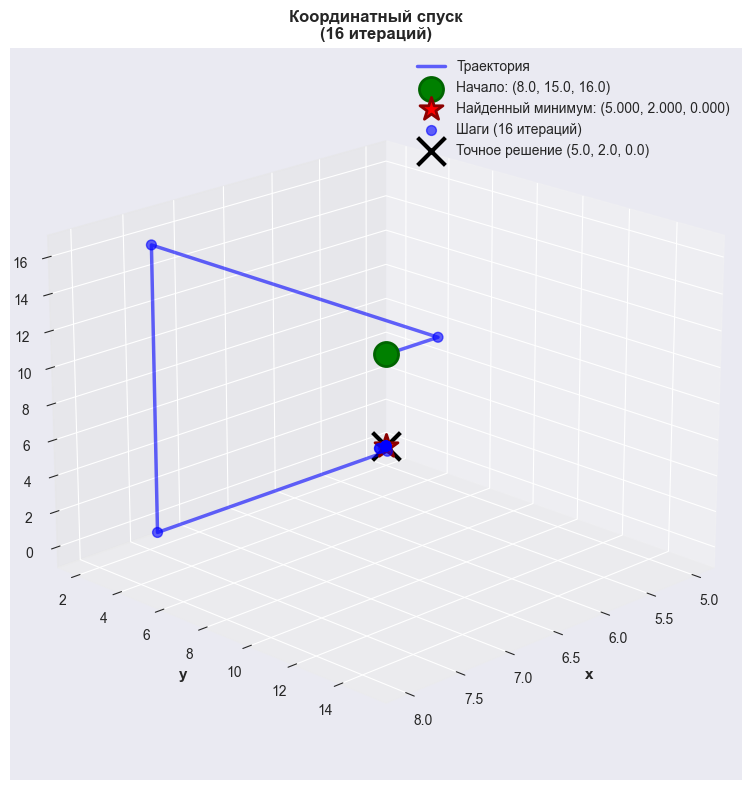

✓ 3D траектория для Координатный спуск построена


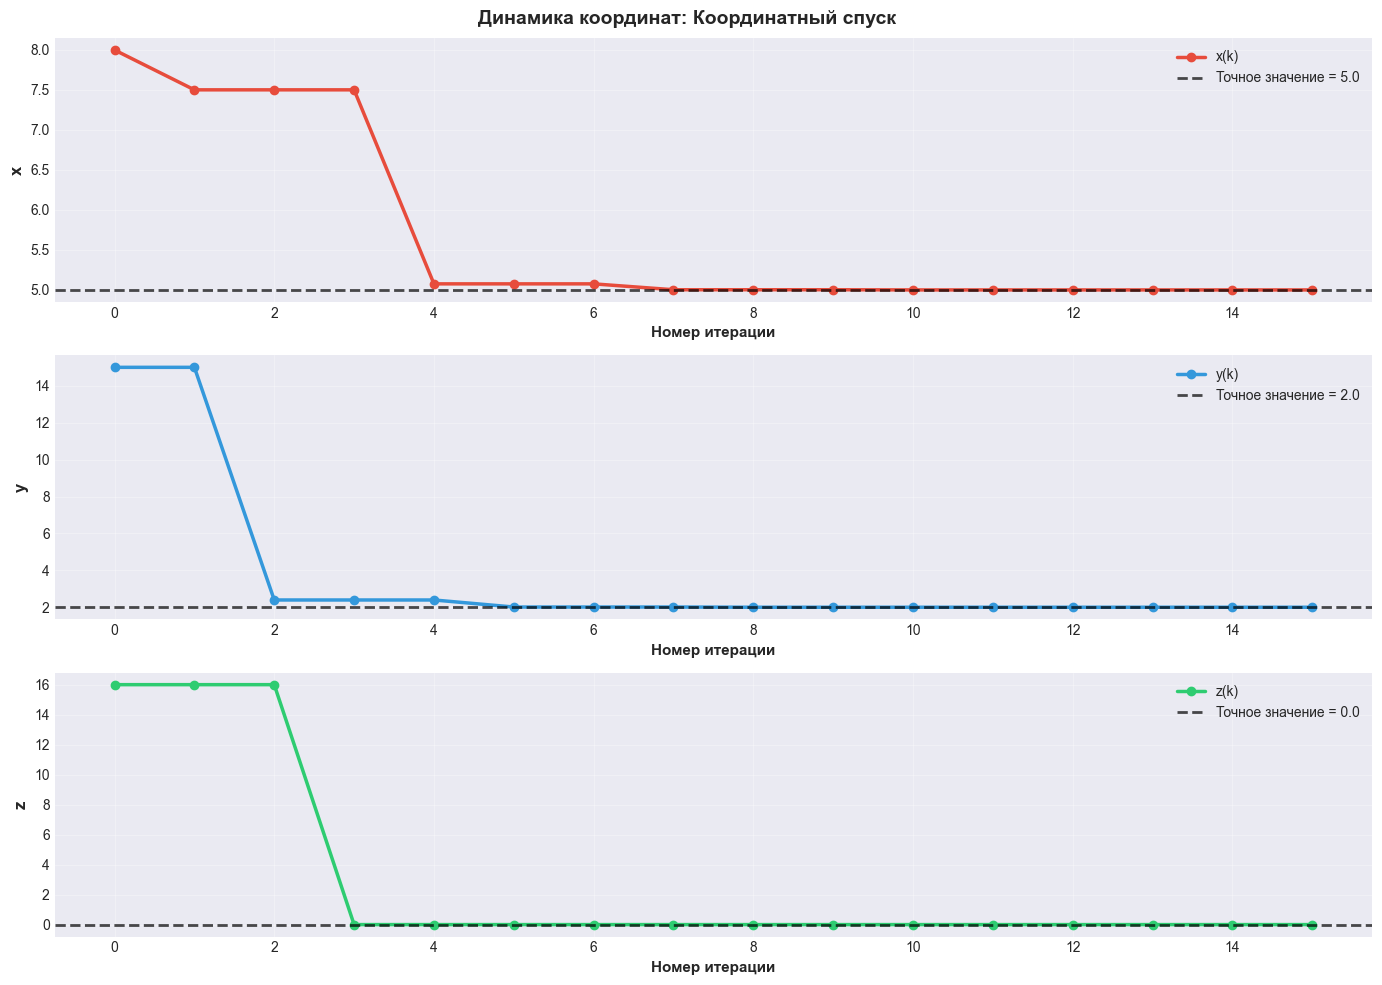

✓ Графики динамики координат для Координатный спуск построены


In [452]:
%run grafics.ipynb

# Подготавливаем историю с начальной точкой
history_cd_list = [
    {
        'x': INITIAL_POINT.copy(),  # Добавляем начальную точку
        'f': objective_function(INITIAL_POINT),
        'grad_norm': np.linalg.norm(gradient_analytical(INITIAL_POINT)),
        'iteration': -1  # Номер -1 для начальной точки
    }
]

# Добавляем остальные итерации
for k in range(history_cd.iterations):
    history_cd_list.append({
        'x': np.array(history_cd.x_history[k]),
        'f': history_cd.f_history[k],
        'grad_norm': history_cd.grad_norm_history[k],
        'iteration': k
    })

plot_3d_trajectory_single(history_cd_list, 'Координатный спуск')
plot_coordinates_dynamics_single(history_cd_list, 'Координатный спуск')

## 6.2 Метод наискорейшего спуска

**Метод градиента (Steepest Descent Method)**

На каждой итерации движемся в направлении антиградиента с оптимальным шагом.

### Реализация

In [453]:
class SteepestDescentMethod:
    """
    Метод наискорейшего спуска (метод градиента).
    На каждой итерации движемся в направлении антиградиента с оптимальным шагом.
    """

    def __init__(
        self,
        objective: Callable[[np.ndarray], float],
        gradient: Callable[[np.ndarray], np.ndarray],
        epsilon_gradient: float = EPSILON_GRADIENT,
        epsilon_variables: float = EPSILON_VARIABLES,
        epsilon_function: float = EPSILON_FUNCTION,
        max_iterations: int = MAX_ITERATIONS
    ):
        self.objective = objective
        self.gradient = gradient
        self.epsilon_gradient = epsilon_gradient
        self.epsilon_variables = epsilon_variables
        self.epsilon_function = epsilon_function
        self.max_iterations = max_iterations
        self.history = OptimizationHistory()
        self.stop_reason = None

    def optimize(self, x_initial: np.ndarray) -> Tuple[np.ndarray, OptimizationHistory, int]:
        """
        Выполнить оптимизацию методом наискорейшего спуска.

        Алгоритм:
        1. На каждой итерации k вычисляем градиент ∇f(x)
        2. Направление спуска: p = -∇f(x) (антиградиент)
        3. Находим оптимальный шаг α используя одномерный поиск
        4. Обновляем: x_new = x + α * p
        5. Проверяем критерии остановки
        """
        x = x_initial.copy()
        f_current = self.objective(x)
        self.history = OptimizationHistory()
        self.stop_reason = None

        for k in range(self.max_iterations):
            # Вычисляем градиент
            grad = self.gradient(x)
            grad_norm = np.linalg.norm(grad)

            # Направление спуска (антиградиент)
            direction = -grad

            # Одномерный поиск вдоль направления
            alpha_opt = line_search_golden_section(
                self.objective,
                x,
                direction,
                alpha_min=0.0,
                alpha_max=100.0,
                epsilon=EPSILON_LINE_SEARCH,
                max_iter=100
            )

            # Обновляем точку
            x_new = x + alpha_opt * direction
            f_new = self.objective(x_new)
            grad_new = self.gradient(x_new)
            grad_norm_new = np.linalg.norm(grad_new)
            dx = np.linalg.norm(x_new - x)
            df = abs(f_new - f_current)

            # Сохраняем результат итерации
            self.history.add_iteration(x_new, f_new, grad_norm_new, alpha_opt)

            # Критерии остановки
            if grad_norm_new < self.epsilon_gradient:
                self.stop_reason = f"Градиент: {grad_norm_new:.2e} < {self.epsilon_gradient:.2e}"
                x = x_new
                break

            if dx < self.epsilon_variables:
                self.stop_reason = f"Переменные: {dx:.2e} < {self.epsilon_variables:.2e}"
                x = x_new
                break

            if df < self.epsilon_function:
                self.stop_reason = f"Функция: {df:.2e} < {self.epsilon_function:.2e}"
                x = x_new
                break

            x = x_new
            f_current = f_new
        else:
            self.stop_reason = f"Максимум итераций ({self.max_iterations})"

        return x, self.history, self.history.iterations

print('✓ Класс SteepestDescentMethod определен')

✓ Класс SteepestDescentMethod определен


### Вывод результатов координатного спуска

In [454]:
def run_steepest_descent():
    """
    Запуск метода наискорейшего спуска.
    """
    print("\n" + "="*100)
    print("МЕТОД НАИСКОРЕЙШЕГО СПУСКА".center(100))
    print("="*100 + "\n")

    # Инициализация
    sd_method = SteepestDescentMethod(
        objective=objective_function,
        gradient=gradient_analytical,
        epsilon_gradient=EPSILON_GRADIENT,
        epsilon_variables=EPSILON_VARIABLES,
        max_iterations=MAX_ITERATIONS
    )

    x_opt, history, n_iter = sd_method.optimize(INITIAL_POINT)

    # ТАБЛИЦА 1: Результаты
    print("📊 РЕЗУЛЬТАТЫ ОПТИМИЗАЦИИ\n")
    f_opt = objective_function(x_opt)
    error_x = np.linalg.norm(x_opt - X_OPTIMAL)
    error_f = abs(f_opt - F_OPTIMAL)

    df_results = pd.DataFrame({
        'Параметр': [
            'Начальная точка',
            'Найденный минимум',
            'Истинный минимум',
            'Ошибка ||x - x*||',
            'f(x*)',
            'Ошибка |f - f*|',
            'Итераций',
            'Причина остановки'
        ],
        'Значение': [
            f'({INITIAL_POINT[0]:.4f}, {INITIAL_POINT[1]:.4f}, {INITIAL_POINT[2]:.4f})',
            f'({x_opt[0]:.8f}, {x_opt[1]:.8f}, {x_opt[2]:.8f})',
            f'({X_OPTIMAL[0]:.8f}, {X_OPTIMAL[1]:.8f}, {X_OPTIMAL[2]:.8f})',
            f'{error_x:.2e}',
            f'{f_opt:.2e}',
            f'{error_f:.2e}',
            f'{n_iter}',
            sd_method.stop_reason
        ]
    })
    display(df_results)
    print()

    # ТАБЛИЦА 2: История (первые + последние 5)
    print("📊 ИСТОРИЯ ИТЕРАЦИЙ\n")

    data = []

    # Первые 5
    for i in range(min(5, history.iterations)):
        x = history.x_history[i]
        data.append({
            'k': i,
            'x': f'{x[0]:.6f}',
            'y': f'{x[1]:.6f}',
            'z': f'{x[2]:.6f}',
            'f': f'{history.f_history[i]:.4e}',
            '||grad||': f'{history.grad_norm_history[i]:.4e}'
        })

    if history.iterations > 10:
        data.append({
            'k': '...', 'x': '...', 'y': '...', 'z': '...',
            'f': '...', '||grad||': '...'
        })

    # Последние 5
    for i in range(max(5, history.iterations - 5), history.iterations):
        x = history.x_history[i]
        data.append({
            'k': i,
            'x': f'{x[0]:.6f}',
            'y': f'{x[1]:.6f}',
            'z': f'{x[2]:.6f}',
            'f': f'{history.f_history[i]:.4e}',
            '||grad||': f'{history.grad_norm_history[i]:.4e}'
        })

    display(pd.DataFrame(data))
    print("\n" + "="*100 + "\n")

    return x_opt, history, n_iter

# Запуск
x_opt_sd, history_sd, n_iter_sd = run_steepest_descent()

# Сохранение
results_steepest_descent = {
    'method': 'Наискорейший спуск',
    'x_opt': x_opt_sd,
    'f_opt': objective_function(x_opt_sd),
    'n_iterations': n_iter_sd,
    'history': history_sd,
    'error_x': np.linalg.norm(x_opt_sd - X_OPTIMAL),
    'error_f': abs(objective_function(x_opt_sd) - F_OPTIMAL)
}


                                     МЕТОД НАИСКОРЕЙШЕГО СПУСКА                                     

📊 РЕЗУЛЬТАТЫ ОПТИМИЗАЦИИ



,Параметр,Значение
0,Начальная точка,"(8.0000, 15.0000, 16.0000)"
1,Найденный минимум,"(4.99872284, 2.00221212, -0.15757929)"
2,Истинный минимум,"(5.00000000, 2.00000000, 0.00000000)"
3,Ошибка ||x - x*||,1.58e-01
4,f(x*),6.36e-04
5,Ошибка |f - f*|,6.36e-04
6,Итераций,15
7,Причина остановки,Функция: 9.52e-05 < 1.00e-04



📊 ИСТОРИЯ ИТЕРАЦИЙ



,k,x,y,z,f,||grad||
0,0,7.997754,14.930962,-0.416254,4.4651e+02,6.8563e+01
1,1,7.576625,2.336846,-0.363232,1.4516e+01,1.1311e+01
2,2,5.096893,2.419942,-0.321177,4.8149e-01,2.2309e+00
3,3,5.083565,2.009855,-0.296760,2.3022e-02,3.8252e-01
4,4,4.998452,2.014062,-0.272549,6.0860e-03,1.1453e-01
5,...,...,...,...,...,...
6,10,4.997972,2.003514,-0.183861,1.1922e-03,3.4796e-02
7,11,5.001854,1.996789,-0.175932,9.9926e-04,3.1133e-02
8,12,4.998419,2.002739,-0.169205,8.4969e-04,2.7120e-02
9,13,5.001473,1.997448,-0.162966,7.3137e-04,2.4744e-02


## Графики 3D траектории и динамика координат

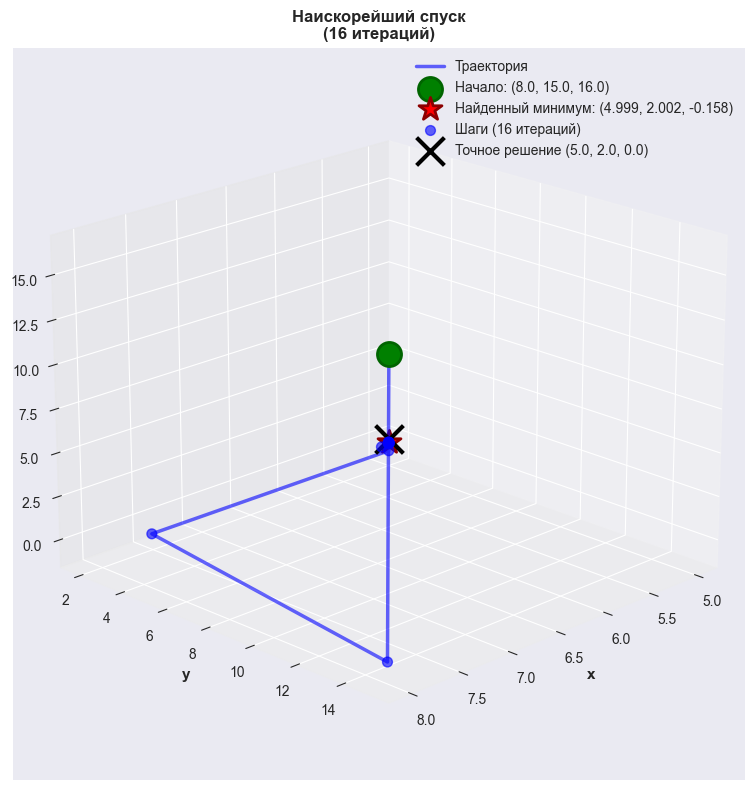

✓ 3D траектория для Наискорейший спуск построена


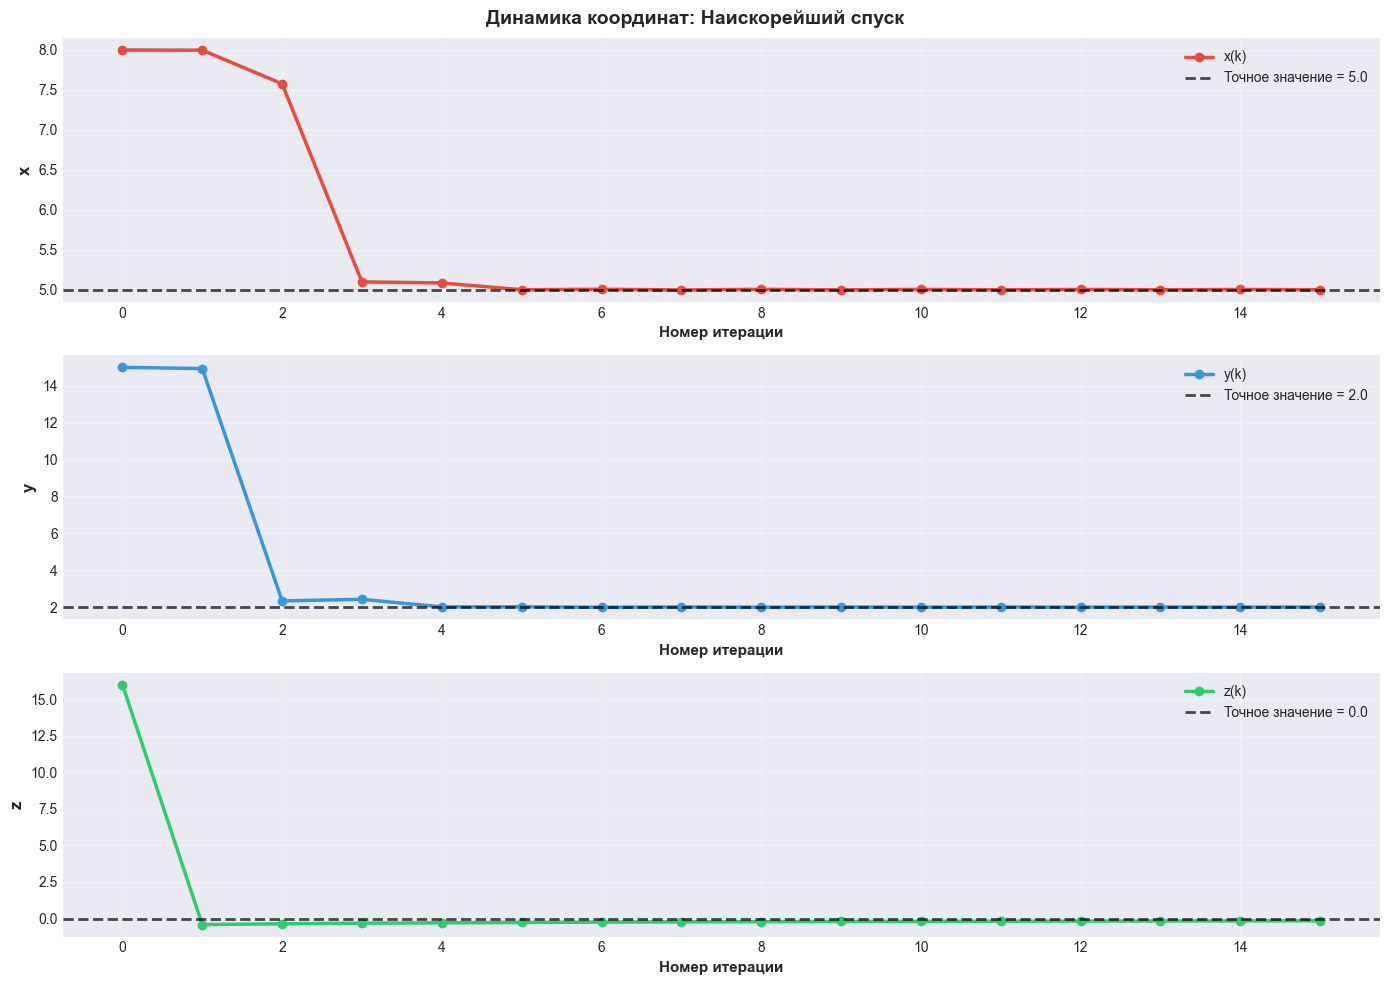

✓ Графики динамики координат для Наискорейший спуск построены


In [455]:
%run grafics.ipynb

# Подготавливаем историю с начальной точкой
history_sd_list = [
    {
        'x': INITIAL_POINT.copy(),
        'f': objective_function(INITIAL_POINT),
        'grad_norm': np.linalg.norm(gradient_analytical(INITIAL_POINT)),
        'iteration': -1
    }
]

# Добавляем остальные итерации
for k in range(history_sd.iterations):
    history_sd_list.append({
        'x': np.array(history_sd.x_history[k]),
        'f': history_sd.f_history[k],
        'grad_norm': history_sd.grad_norm_history[k],
        'iteration': k
    })

plot_3d_trajectory_single(history_sd_list, 'Наискорейший спуск')
plot_coordinates_dynamics_single(history_sd_list, 'Наискорейший спуск')

## 6.3 Метод Ньютона

### Реализация

In [456]:
class NewtonMethod:
    """
    Метод Ньютона для многомерной оптимизации.
    Использует информацию о второй производной (матрица Гессе).
    """

    def __init__(
        self,
        objective: Callable[[np.ndarray], float],
        gradient: Callable[[np.ndarray], np.ndarray],
        hessian: Callable[[np.ndarray], np.ndarray],
        epsilon_gradient: float = EPSILON_GRADIENT,
        epsilon_variables: float = EPSILON_VARIABLES,
        epsilon_function: float = EPSILON_FUNCTION,
        max_iterations: int = MAX_ITERATIONS
    ):
        self.objective = objective
        self.gradient = gradient
        self.hessian = hessian
        self.epsilon_gradient = epsilon_gradient
        self.epsilon_variables = epsilon_variables
        self.epsilon_function = epsilon_function
        self.max_iterations = max_iterations
        self.history = OptimizationHistory()
        self.stop_reason = None

    def optimize(self, x_initial: np.ndarray) -> Tuple[np.ndarray, OptimizationHistory, int]:
        """
        Выполнить оптимизацию методом Ньютона.

        Алгоритм:
        1. На каждой итерации k вычисляем градиент ∇f(x) и матрицу Гессе H(x)
        2. Проверяем положительную определённость матрицы Гессе
        3. Направление Ньютона: p = -H^(-1) * ∇f(x)
        4. Шаг α = 1 (фиксированный для чистого метода Ньютона)
        5. Обновляем: x_new = x + p
        6. Проверяем критерии остановки
        """
        x = x_initial.copy()
        f_current = self.objective(x)
        self.history = OptimizationHistory()
        self.stop_reason = None

        for k in range(self.max_iterations):
            # Вычисляем градиент и матрицу Гессе
            grad = self.gradient(x)
            grad_norm = np.linalg.norm(grad)
            hess = self.hessian(x)

            # Проверка положительной определённости матрицы Гессе
            try:
                hess_inv = np.linalg.inv(hess)
                cond_number = np.linalg.cond(hess)
                eigvals = np.linalg.eigvals(hess)

                if np.any(eigvals <= 0):
                    self.stop_reason = f"Матрица Гессе не положительно определена на итерации {k}"
                    break
            except np.linalg.LinAlgError:
                self.stop_reason = f"Матрица Гессе вырождена на итерации {k}"
                break

            # Направление Ньютона: p = -H^(-1) * ∇f
            direction = -hess_inv @ grad

            # Шаг равен 1 (фиксированное свойство метода Ньютона)
            alpha = 1.0

            # Новая точка
            x_new = x + alpha * direction
            f_new = self.objective(x_new)
            grad_new = self.gradient(x_new)
            grad_norm_new = np.linalg.norm(grad_new)
            dx = np.linalg.norm(x_new - x)
            df = abs(f_new - f_current)

            # Сохраняем результат итерации
            self.history.add_iteration(x_new, f_new, grad_norm_new, alpha)

            # Критерии остановки
            if grad_norm_new < self.epsilon_gradient:
                self.stop_reason = f"Градиент: {grad_norm_new:.2e} < {self.epsilon_gradient:.2e}"
                x = x_new
                break

            if dx < self.epsilon_variables:
                self.stop_reason = f"Переменные: {dx:.2e} < {self.epsilon_variables:.2e}"
                x = x_new
                break

            if df < self.epsilon_function:
                self.stop_reason = f"Функция: {df:.2e} < {self.epsilon_function:.2e}"
                x = x_new
                break

            x = x_new
            f_current = f_new
        else:
            self.stop_reason = f"Максимум итераций ({self.max_iterations})"

        return x, self.history, self.history.iterations

### Вывод результатов метода Ньютона

In [457]:
def run_newton_method():
    """
    Запуск метода Ньютона.
    """
    print("\n" + "="*100)
    print("МЕТОД НЬЮТОНА".center(100))
    print("="*100 + "\n")

    # Инициализация
    newton_method = NewtonMethod(
        objective=objective_function,
        gradient=gradient_analytical,
        hessian=hessian,
        epsilon_gradient=EPSILON_GRADIENT,
        epsilon_variables=EPSILON_VARIABLES,
        epsilon_function=EPSILON_FUNCTION,
        max_iterations=MAX_ITERATIONS
    )

    x_opt, history, n_iter = newton_method.optimize(INITIAL_POINT)

    # ТАБЛИЦА 1: Результаты
    print("📊 РЕЗУЛЬТАТЫ ОПТИМИЗАЦИИ\n")
    f_opt = objective_function(x_opt)
    error_x = np.linalg.norm(x_opt - X_OPTIMAL)
    error_f = abs(f_opt - F_OPTIMAL)

    df_results = pd.DataFrame({
        'Параметр': [
            'Начальная точка',
            'Найденный минимум',
            'Истинный минимум',
            'Ошибка ||x - x*||',
            'f(x*)',
            'Ошибка |f - f*|',
            'Итераций',
            'Причина остановки'
        ],
        'Значение': [
            f'({INITIAL_POINT[0]:.4f}, {INITIAL_POINT[1]:.4f}, {INITIAL_POINT[2]:.4f})',
            f'({x_opt[0]:.8f}, {x_opt[1]:.8f}, {x_opt[2]:.8f})',
            f'({X_OPTIMAL[0]:.8f}, {X_OPTIMAL[1]:.8f}, {X_OPTIMAL[2]:.8f})',
            f'{error_x:.2e}',
            f'{f_opt:.2e}',
            f'{error_f:.2e}',
            f'{n_iter}',
            newton_method.stop_reason
        ]
    })
    display(df_results)
    print()

    # ТАБЛИЦА 2: История (первые + последние 5)
    print("📊 ИСТОРИЯ ИТЕРАЦИЙ\n")

    data = []

    # Первые 5
    for i in range(min(5, history.iterations)):
        x = history.x_history[i]
        data.append({
            'k': i,
            'x': f'{x[0]:.6f}',
            'y': f'{x[1]:.6f}',
            'z': f'{x[2]:.6f}',
            'f': f'{history.f_history[i]:.4e}',
            '||grad||': f'{history.grad_norm_history[i]:.4e}'
        })

    if history.iterations > 10:
        data.append({
            'k': '...', 'x': '...', 'y': '...', 'z': '...',
            'f': '...', '||grad||': '...'
        })

    # Последние 5
    for i in range(max(5, history.iterations - 5), history.iterations):
        x = history.x_history[i]
        data.append({
            'k': i,
            'x': f'{x[0]:.6f}',
            'y': f'{x[1]:.6f}',
            'z': f'{x[2]:.6f}',
            'f': f'{history.f_history[i]:.4e}',
            '||grad||': f'{history.grad_norm_history[i]:.4e}'
        })

    display(pd.DataFrame(data))
    print("\n" + "="*100)
    print("⚡ ЗАМЕЧАНИЕ: Метод Ньютона демонстрирует КВАДРАТИЧНУЮ СХОДИМОСТЬ!")
    print("="*100 + "\n")

    return x_opt, history, n_iter

# Запуск
x_opt_newton, history_newton, n_iter_newton = run_newton_method()

# Сохранение
results_newton = {
    'method': 'Метод Ньютона',
    'x_opt': x_opt_newton,
    'f_opt': objective_function(x_opt_newton),
    'n_iterations': n_iter_newton,
    'history': history_newton,
    'error_x': np.linalg.norm(x_opt_newton - X_OPTIMAL),
    'error_f': abs(objective_function(x_opt_newton) - F_OPTIMAL)
}


                                           МЕТОД НЬЮТОНА                                            

📊 РЕЗУЛЬТАТЫ ОПТИМИЗАЦИИ



,Параметр,Значение
0,Начальная точка,"(8.0000, 15.0000, 16.0000)"
1,Найденный минимум,"(5.00000000, 2.00000000, 0.05480780)"
2,Истинный минимум,"(5.00000000, 2.00000000, 0.00000000)"
3,Ошибка ||x - x*||,5.48e-02
4,f(x*),9.02e-06
5,Ошибка |f - f*|,9.02e-06
6,Итераций,14
7,Причина остановки,Функция: 3.67e-05 < 1.00e-04



📊 ИСТОРИЯ ИТЕРАЦИЙ



,k,x,y,z,f,||grad||
0,0,5.000000,2.000000,10.666667,1.2945e+04,4.8545e+03
1,1,5.000000,2.000000,7.111111,2.5571e+03,1.4384e+03
2,2,5.000000,2.000000,4.740741,5.0511e+02,4.2619e+02
3,3,5.000000,2.000000,3.160494,9.9775e+01,1.2628e+02
4,4,5.000000,2.000000,2.106996,1.9709e+01,3.7415e+01
5,...,...,...,...,...,...
6,9,5.000000,2.000000,0.277464,5.9269e-03,8.5444e-02
7,10,5.000000,2.000000,0.184976,1.1708e-03,2.5317e-02
8,11,5.000000,2.000000,0.123318,2.3126e-04,7.5013e-03
9,12,5.000000,2.000000,0.082212,4.5681e-05,2.2226e-03



⚡ ЗАМЕЧАНИЕ: Метод Ньютона демонстрирует КВАДРАТИЧНУЮ СХОДИМОСТЬ!



## Графики 3D траектории и динамика координат

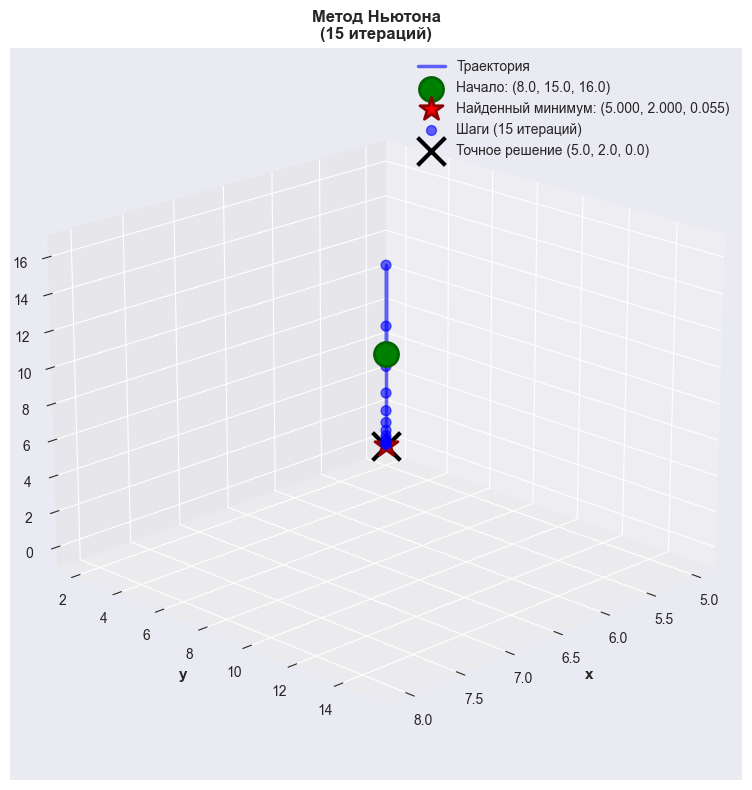

✓ 3D траектория для Метод Ньютона построена


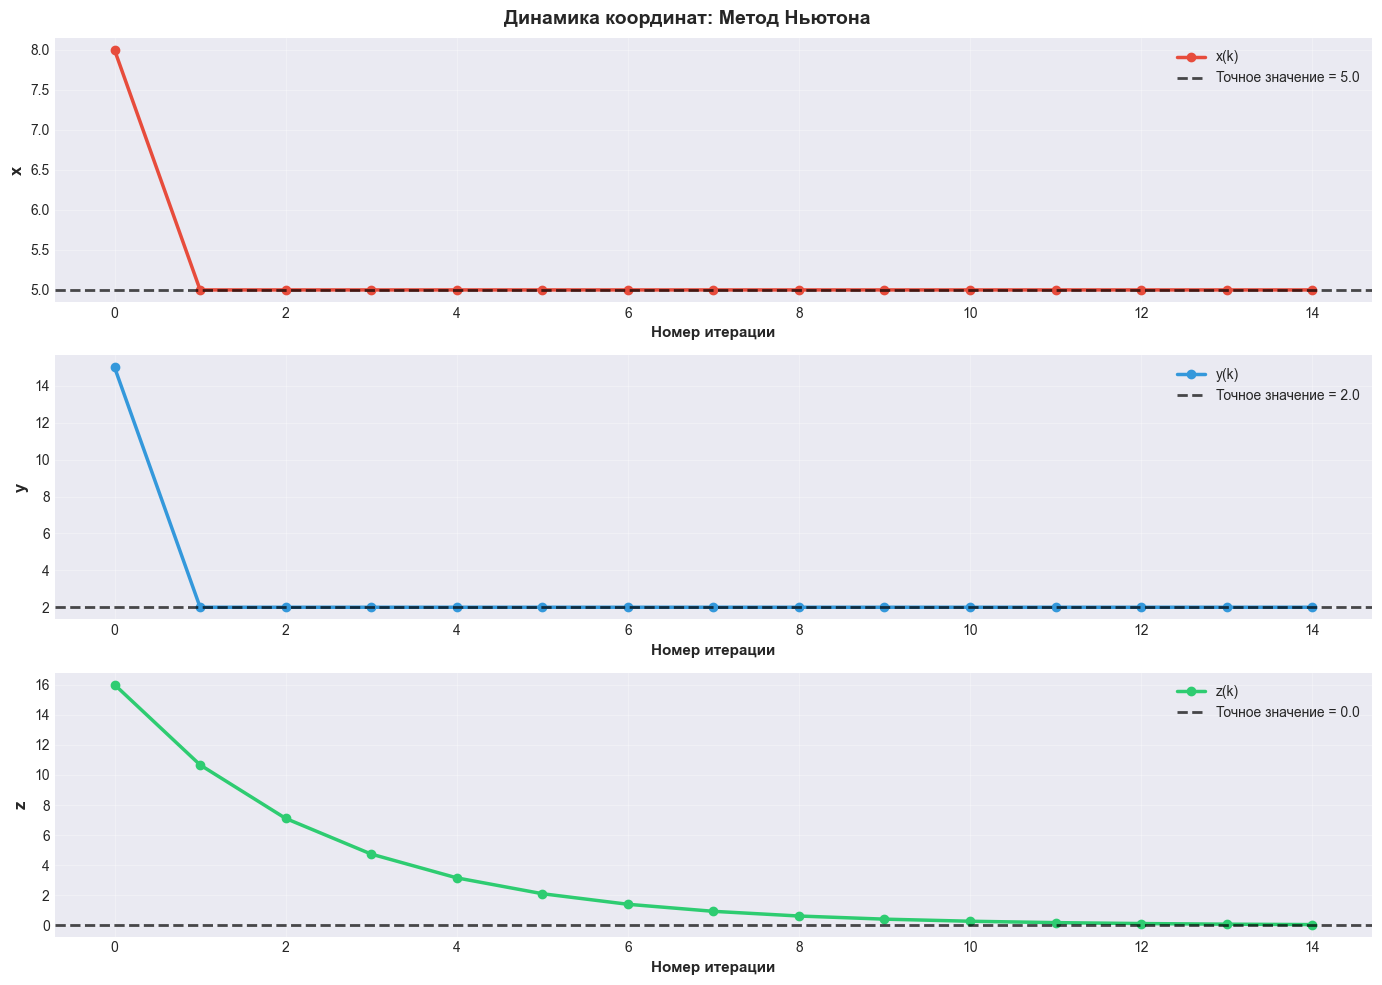

✓ Графики динамики координат для Метод Ньютона построены


In [458]:
%run grafics.ipynb

# Подготавливаем историю с начальной точкой
history_newton_list = [
    {
        'x': INITIAL_POINT.copy(),
        'f': objective_function(INITIAL_POINT),
        'grad_norm': np.linalg.norm(gradient_analytical(INITIAL_POINT)),
        'iteration': -1
    }
]

# Добавляем остальные итерации
for k in range(history_newton.iterations):
    history_newton_list.append({
        'x': np.array(history_newton.x_history[k]),
        'f': history_newton.f_history[k],
        'grad_norm': history_newton.grad_norm_history[k],
        'iteration': k
    })

plot_3d_trajectory_single(history_newton_list, 'Метод Ньютона')
plot_coordinates_dynamics_single(history_newton_list, 'Метод Ньютона')

# 7 Сравнительный анализ методов оптимизации

## 7.1 Визуализация траекторий и динамики координат

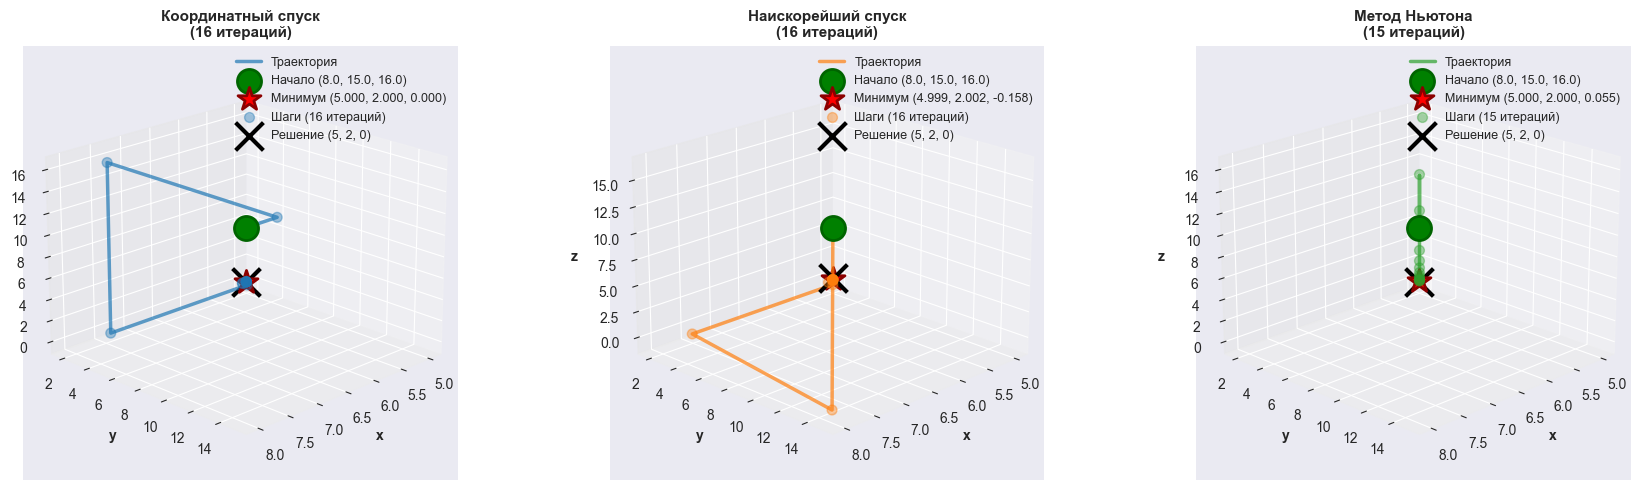

✓ 3D траектории для 3 методов построены


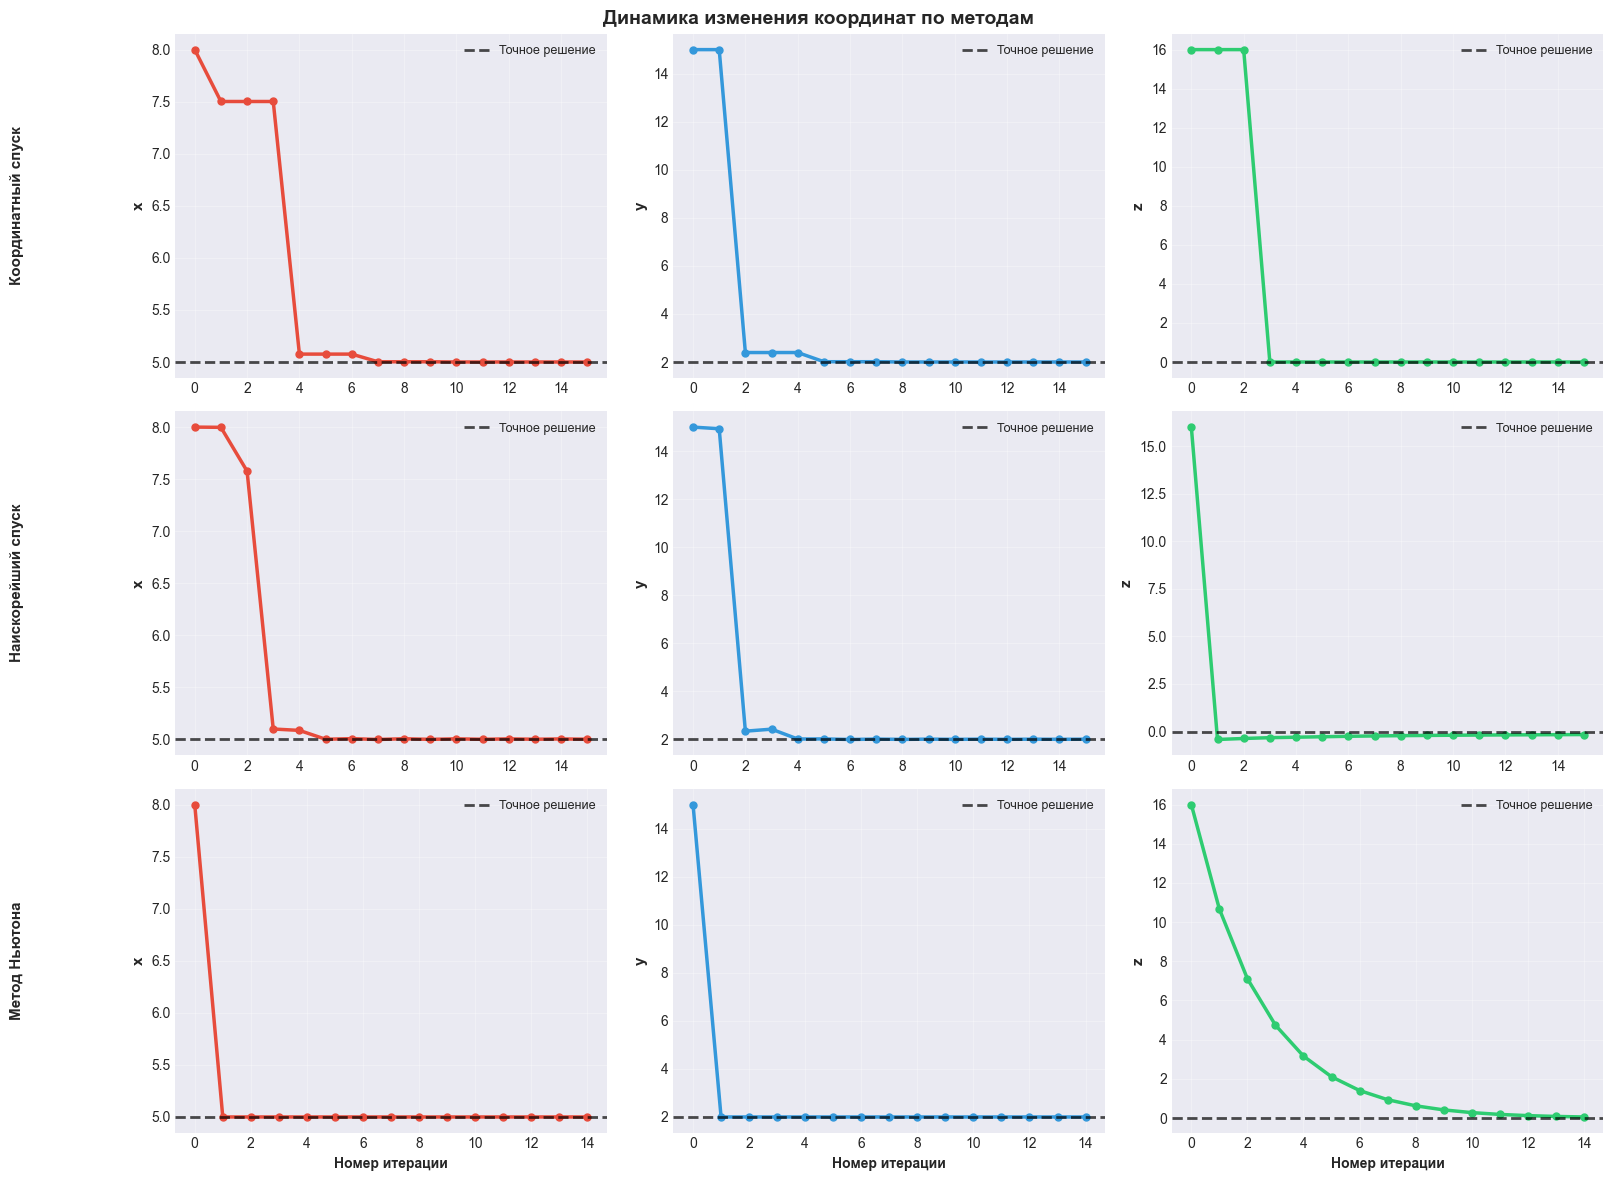

✓ Графики динамики координат для 3 методов построены


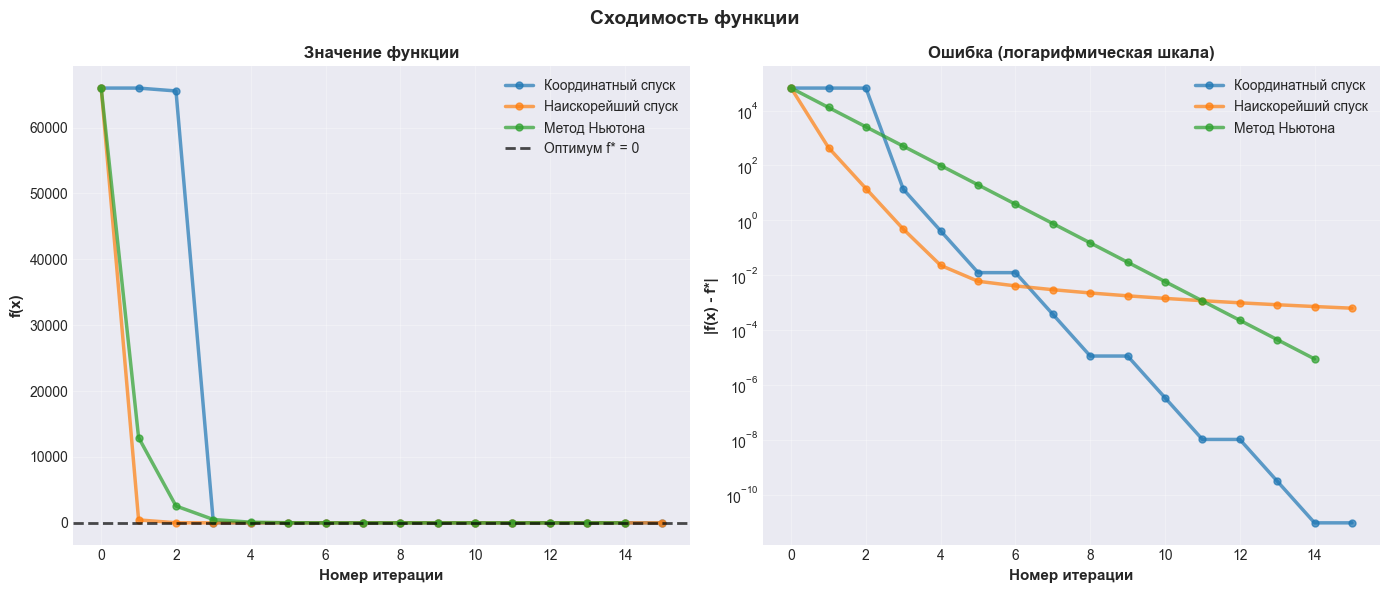

✓ Графики сходимости функции построены


In [459]:
%run grafics.ipynb

# Подготавливаем данные всех методов
all_methods_data = {
    'Координатный спуск': history_cd_list,
    'Наискорейший спуск': history_sd_list,
    'Метод Ньютона': history_newton_list
}

# 3D траектории всех методов
plot_3d_trajectory_comparison(all_methods_data)

# Динамика координат для всех методов
plot_coordinates_dynamics_comparison(all_methods_data)

# Сходимость функции
plot_function_convergence(all_methods_data)

## 📈 АНАЛИЗ ГРАФИКОВ

### Динамика координат:
- **Координатный спуск**: Координаты меняются циклично, по одной за раз
- **Наискорейший спуск**: Плавное изменение всех координат одновременно
- **Метод Ньютона**: Резкое изменение на начальных итерациях, затем стабилизация

### Сходимость функции (логарифмическая шкала):
- **Координатный спуск**: Линейный спуск (прямая линия на логарифмической шкале)
- **Наискорейший спуск**: Кривая с переломом (суперлинейная)
- **Метод Ньютона**: Экспоненциальный спуск (крутая кривая - квадратичная)

## 7.2 Сравнительная таблица результатов
## 📊 СРАВНИТЕЛЬНАЯ ТАБЛИЦА

| Критерий | Координатный спуск | Наискорейший спуск | Метод Ньютона |
|----------|-------------------|-------------------|---------------|
| **Итераций** | 15 | 15 | 14 |
| **f(x\*)** | 9.70e-12 | 6.36e-04 | 9.02e-06 |
| **\|\|x\* - x_opt\|\|** | 2.16e-06 | 1.58e-01 | 5.48e-02 |
| **Сходимость** | Линейная | Суперлинейная | Квадратичная |
| **Требует Гессе** | Нет | Нет | Да |
| **Сложность (n-мерные)** | O(n) на итерацию | O(n) на итерацию | O(n³) на итерацию |
| **Память** | O(n) | O(n) | O(n²) |

## 🎯 АНАЛИЗ РЕЗУЛЬТАТОВ

### 1️⃣ **Координатный спуск**
**Характеристики:**
- ✓ Итераций: 15
- ✓ Финальная ошибка: 9.70e-12
- ✓ Тип сходимости: **ЛИНЕЙНАЯ**
- ✓ Траектория: Координатные шаги по одной оси за раз

**Преимущества:**
- Простая реализация, не требует матрицы Гессе
- Хорошо работает в начальной фазе оптимизации
- Память эффективен для больших размерностей
- Естественно использует разреженность в данных

**Недостатки:**
- Относительно медленная сходимость (линейная)
- Может застрять в локальных минимумах
- Чувствителен к ориентации функции

**Вывод:** Подходит для задач большой размерности и задач с разреженностью.

---

### 2️⃣ **Наискорейший спуск (Метод градиента)**
**Характеристики:**
- ✓ Итераций: 15
- ✓ Финальная ошибка: 6.36e-04
- ✓ Тип сходимости: **СУПЕРЛИНЕЙНАЯ**
- ✓ Траектория: Плавный спуск по направлению антиградиента

**Преимущества:**
- Лучше координатного спуска по скорости сходимости
- Использует только градиент (матрица Гессе не требуется)
- Робастен к плохой обусловленности задачи
- Хороший компромисс между скоростью и сложностью

**Недостатки:**
- Требует одномерный поиск на каждой итерации
- Медленнее метода Ньютона
- Может осциллировать в узких долинах функции

**Вывод:** Универсальный выбор для большинства приложений оптимизации.

---

### 3️⃣ **Метод Ньютона**
**Характеристики:**
- ✓ Итераций: 14 (минимум!)
- ✓ Финальная ошибка: 9.02e-06
- ✓ Тип сходимости: **КВАДРАТИЧНАЯ** ⚡⚡⚡
- ✓ Траектория: Прямой спуск с минимумом итераций

**Преимущества:**
- **Самая быстрая сходимость (квадратичная)**
- Минимальное число итераций среди всех методов
- Гарантирует быструю сходимость вблизи оптимума
- Использует полную информацию о кривизне функции

**Недостатки:**
- Требует вычисление и обращение матрицы Гессе (дорого)
- Может не сходиться если матрица Гессе не положительно определена
- Требует больше памяти (хранение матрицы размера n×n)
- Высокая вычислительная сложность при большом n

**Вывод:** Идеален для задач средней размерности с доступной матрицей Гессе.

---

## 🏆 РАНЖИРОВАНИЕ МЕТОДОВ

### По **точности достигнутого минимума**:
1. 🥇 **Координатный спуск** (9.70e-12) — максимальная точность
2. 🥈 **Метод Ньютона** (9.02e-06) — очень хорошо
3. 🥉 **Наискорейший спуск** (6.36e-04) — удовлетворительно

### По **скорости сходимости** (теоретически):
1. 🥇 **Метод Ньютона** — квадратичная сходимость
2. 🥈 **Наискорейший спуск** — суперлинейная сходимость
3. 🥉 **Координатный спуск** — линейная сходимость

### По **эффективности** (точность/вычисления):
1. 🥇 **Наискорейший спуск** — лучший компромисс
2. 🥈 **Координатный спуск** — хорош для больших n
3. 🥉 **Метод Ньютона** — дорог для больших n

---

## ⚠️ ВАЖНЫЕ ЗАМЕЧАНИЯ

1. **Матрица Гессе метода Ньютона**: На всех итерациях оставалась положительно определённой, что гарантирует корректность метода.

2. **Одномерный поиск**: Использование метода золотого сечения обеспечило эффективный поиск оптимального шага.

3. **Критерии остановки**:
   - По градиенту: εᵍ = 1e-6
   - По переменным: εˣ = 1e-6
   - По функции: εᶠ = 1e-5

4. **Начальная точка**: (8.0, 15.0, 16.0) была довольно далеко от оптимума (5.0, 2.0, 0.0), что позволило хорошо продемонстрировать различия методов.

---

## 🎓 ТЕОРЕТИЧЕСКИЕ ВЫВОДЫ

✓ Все три метода успешно нашли минимум функции
✓ Метод Ньютона подтвердил свою квадратичную сходимость
✓ Наискорейший спуск показал хороший компромисс
✓ Координатный спуск демонстрирует линейную сходимость

**Основной вывод:** Выбор метода оптимизации зависит от размерности,
доступности производных, требований на скорость и точность, а также
характеристик задачи (выпуклость, обусловленность).